# Ομάδα Α25
## Φοίβος Καλογιάννης, ΑΜ:03114831
## Νίκος Τσιλιβής, ΑΜ: 03114078

# Άσκηση 3: Βελτιστοποίηση συναρτήσεων με Γενετικούς Αλγόριθμους
v1.0, 08/01/2019

<img src="http://infinity77.net/global_optimization/_images/Alpine01.png" alt="Alpine01" style="width: 500px;"/>

Στόχος της άσκησης είναι η βελτιστοποίηση συναρτήσεων χωρίς παραγώγους (derivative free optimization) με χρήση Γενετικών Αλγόριθμων μέσω της βιβλιοθήκης DEAP. Η βελτιστοποίηση χωρίς παραγώγους είναι ιδιαίτερα χρήσιμη σε περιπτώσεις όπου η αντικειμενική συνάρτηση $f$ δεν είναι διαθέσιμη (black-box optimization) ή σε περίπτωσεις που είναι, είναι δύσκολο ή μη πρακτικό να υπολογιστούν οι παράγωγοί της. Για παράδειγμα η  $f$ μπορεί να μην είναι διαφορίσιμη, η παραγώγιση της μπορεί να είναι δύσκολη ή να απαιτεί πολύ χρόνο,  η $f$ να περιέχει θόρυβο έτσι ώστε οι μέθοδοι που βασίζονται σε απειροστικές διαφορές να μην είναι αποτελεσματικές ή να υπάρχουν πολλά τοπικά ελάχιστα μεταξύ άλλων. 

Για περισσότερα πάνω στη βελτιστοποίηση χωρίς παραγώγους και τις εφαρμογές της, μπορείτε να συμβουλευτείτε το ["Gradient Free Optimization"](http://adl.stanford.edu/aa222/lecture_notes_files/chapter6_gradfree.pdf). 

Οφείλουμε εδώ να αναφέρουμε ότι κάποιες από τις συναρτήσεις που θα μελετήσουμε με ΓΑ μπορούν να βελτιστοποιηθούν πολύ ικανοποιητικά, ειδικά σε μικρές διαστάσεις, και με κλασικές αριθμητικές μεθόδους.

In [0]:
# ! pip install deap

## Συναρτήσεις προς βελτιστοποίηση

Σε κάθε ομάδα αντιστοιχεί μία μη-κλιμακούμενη συνάρτηση (non-scalable, δηλαδή ορίζεται για συγκεκριμένες διαστάσεις του πεδίου ορισμού) και μία κλιμακούμενη (scalable, μπορεί να οριστεί για οποιαδήποτε διάσταση D). 

Καμία ομάδα δεν έχει τις ίδιες συναρτήσεις συνολικά με κάποια άλλη.

 Στο [“Ομάδες - Συναρτήσεις”](https://docs.google.com/spreadsheets/d/1g9otvvm1GIALF5c3Fsf45tULdoDZAmXnjmXyuW4sbro/edit?usp=sharing) θα βρείτε έναν αριθμό για τη μη-κλιμακούμενη συνάρτηση και έναν αριθμό για την κλιμακούμενη συνάρτηση που αντιστοιχούν στην ομάδα σας.
 
Θα βρείτε σε ποια συνάρτηση αντιστοιχεί ο κάθε αριθμός στο paper [“Α Literature Survey of Benchmark Functions For Global Optimization Problems”](https://goo.gl/qAhxNf), στο Section 3 (σελ. 5 και εξής). 

**Προσοχή:** ορισμένες συναρτήσεις όπως αναγράφονται στο paper έχουν μικρά (εώς μεσαία) λάθη ή χρειάζονται κάποια επεξήγηση. Έχουμε συγκεντρώσει τα errata που έχουμε ανακαλύψει μέχρι τώρα στο έγγραφο ["Errata στους ορισμούς συναρτήσεων"](https://drive.google.com/open?id=1MrRpq8q_hDfBZVw1CHBzC7t4biQkAftu3LEWXJMf6s0), παρακαλούμε συμβουλευτείτε το **απαραίτητα** για να δείτε αν αφορά σε κάποια από τις συναρτήσεις σας.

Οι ομάδες που έχουν μη-κλιμακούμενες συναρτήσεις με κωδικούς Α01-Α10 ή κλιμακούμενες συναρτήσεις με κωδικούς B01-B10 θα βρουν τους ορισμούς που τους αντιστοιχούν στο συμπληρωματικό έγγραφο ["Πρόσθετοι ορισμοί συναρτήσεων"](https://docs.google.com/document/d/1F-YJ5Ripo0N5ZAXCS52eGqNVB9RF6ZTvjnOh5ICHfss/edit?usp=sharing).

Όλες οι συναρτήσεις είναι προς **ελαχιστοποίηση**.

In [0]:
import numpy as np

In [0]:
from deap import base, creator, tools


## Μέρος 2. Μελέτη κλιμακούμενης συνάρτησης

Όπως είδαμε και στο παράδειγμα του 0-1 Knapsack, πολλά προβλήματα μπορεί να λύνονται εύκολα σε μικρές διαστάσεις αλλά γίνονται δυσκολότερα όσο οι διαστάσεις μεγαλώνουν. Συνεπώς, μια επιθυμητή ιδιότητα για έναν αλγόριθμο είναι να μπορεί να αντιμετωπίζει την κλιμάκωση των προβλημάτων. Συνεπώς, η μελέτη της κλιμακούμενης συνάρτησή σας συνίσταται στα ακόλουθα ζητούμενα.


<i>Pathological Function:</i>
$$ f(X)=\sum_{i=1}^{n-1}\left[0.5+\frac{\sin^2\left(\sqrt{100x^2_i+x^2_{i+1}}\right)-0.5}{1+0.001\left(x^2_i-2x_ix_{i+1}+x^2_{i+1}\right)^2}\right]
$$

In [0]:
def pathological(x):
    try:
        if isinstance(x, (tuple,list)):
            x = np.asarray(x)
        xx = np.power(x,2)
        nom = 100*xx[:-1] + xx[1:]
        nom = np.sin(np.sqrt(nom))
        nom = np.power(nom,2)
        nom = nom - 0.5
        den = xx[:-1] - 2*x[:-1]*x[1:] + xx[:1]
        den = np.power(den,2)
        den = 0.001*den + 1
        y = 0.5 + np.divide(nom, den)
        return (np.sum(y,0),)
    except:
        res = np.sin(np.sqrt(100*x*x)) - 0.5
        res = res/(1+0.001*x**4)
        res += 0.5
        return (res,)

In [0]:
MIN_BOUND = -100
MAX_BOUND = 100

def feasible( indiv ):
    for val in range(len(indiv)):
        if ( val < MIN_BOUND) or ( val > MAX_BOUND):
            return False
    return True

def distance( indiv ) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = 0 - indiv [i]
        if ( indiv [i] > MAX_BOUND[i]) : penalty = indiv [i] - pi
        dist = dist + penalty
    return dist


### Για D=2

- α) Εκτυπώστε ένα “3D” γράφημα της συνάρτησης $f(x1,x2)$ και περιγράψτε σύντομα τη μορφή της (βέλτιστα, κοίλα, κοιλάδες, λεκάνες, ασυνέχειες κλπ)
- β) Με την διαδικασία που ακολουθήσαμε προηγουμένως για τη μη κλιμακούμενη συνάρτηση, βρείτε τον βέλτιστο γενετικό αλγόριθμο και τη βέλτιστη τιμή για το πρόβλημα.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource

In [0]:
x = np.linspace(-100,100,200*10)
y = np.linspace(-100,100,200*10)
x, y = np.meshgrid(x,y)
z, = pathological(np.asarray([x,y]))

In [0]:
z.shape

(2000, 2000)

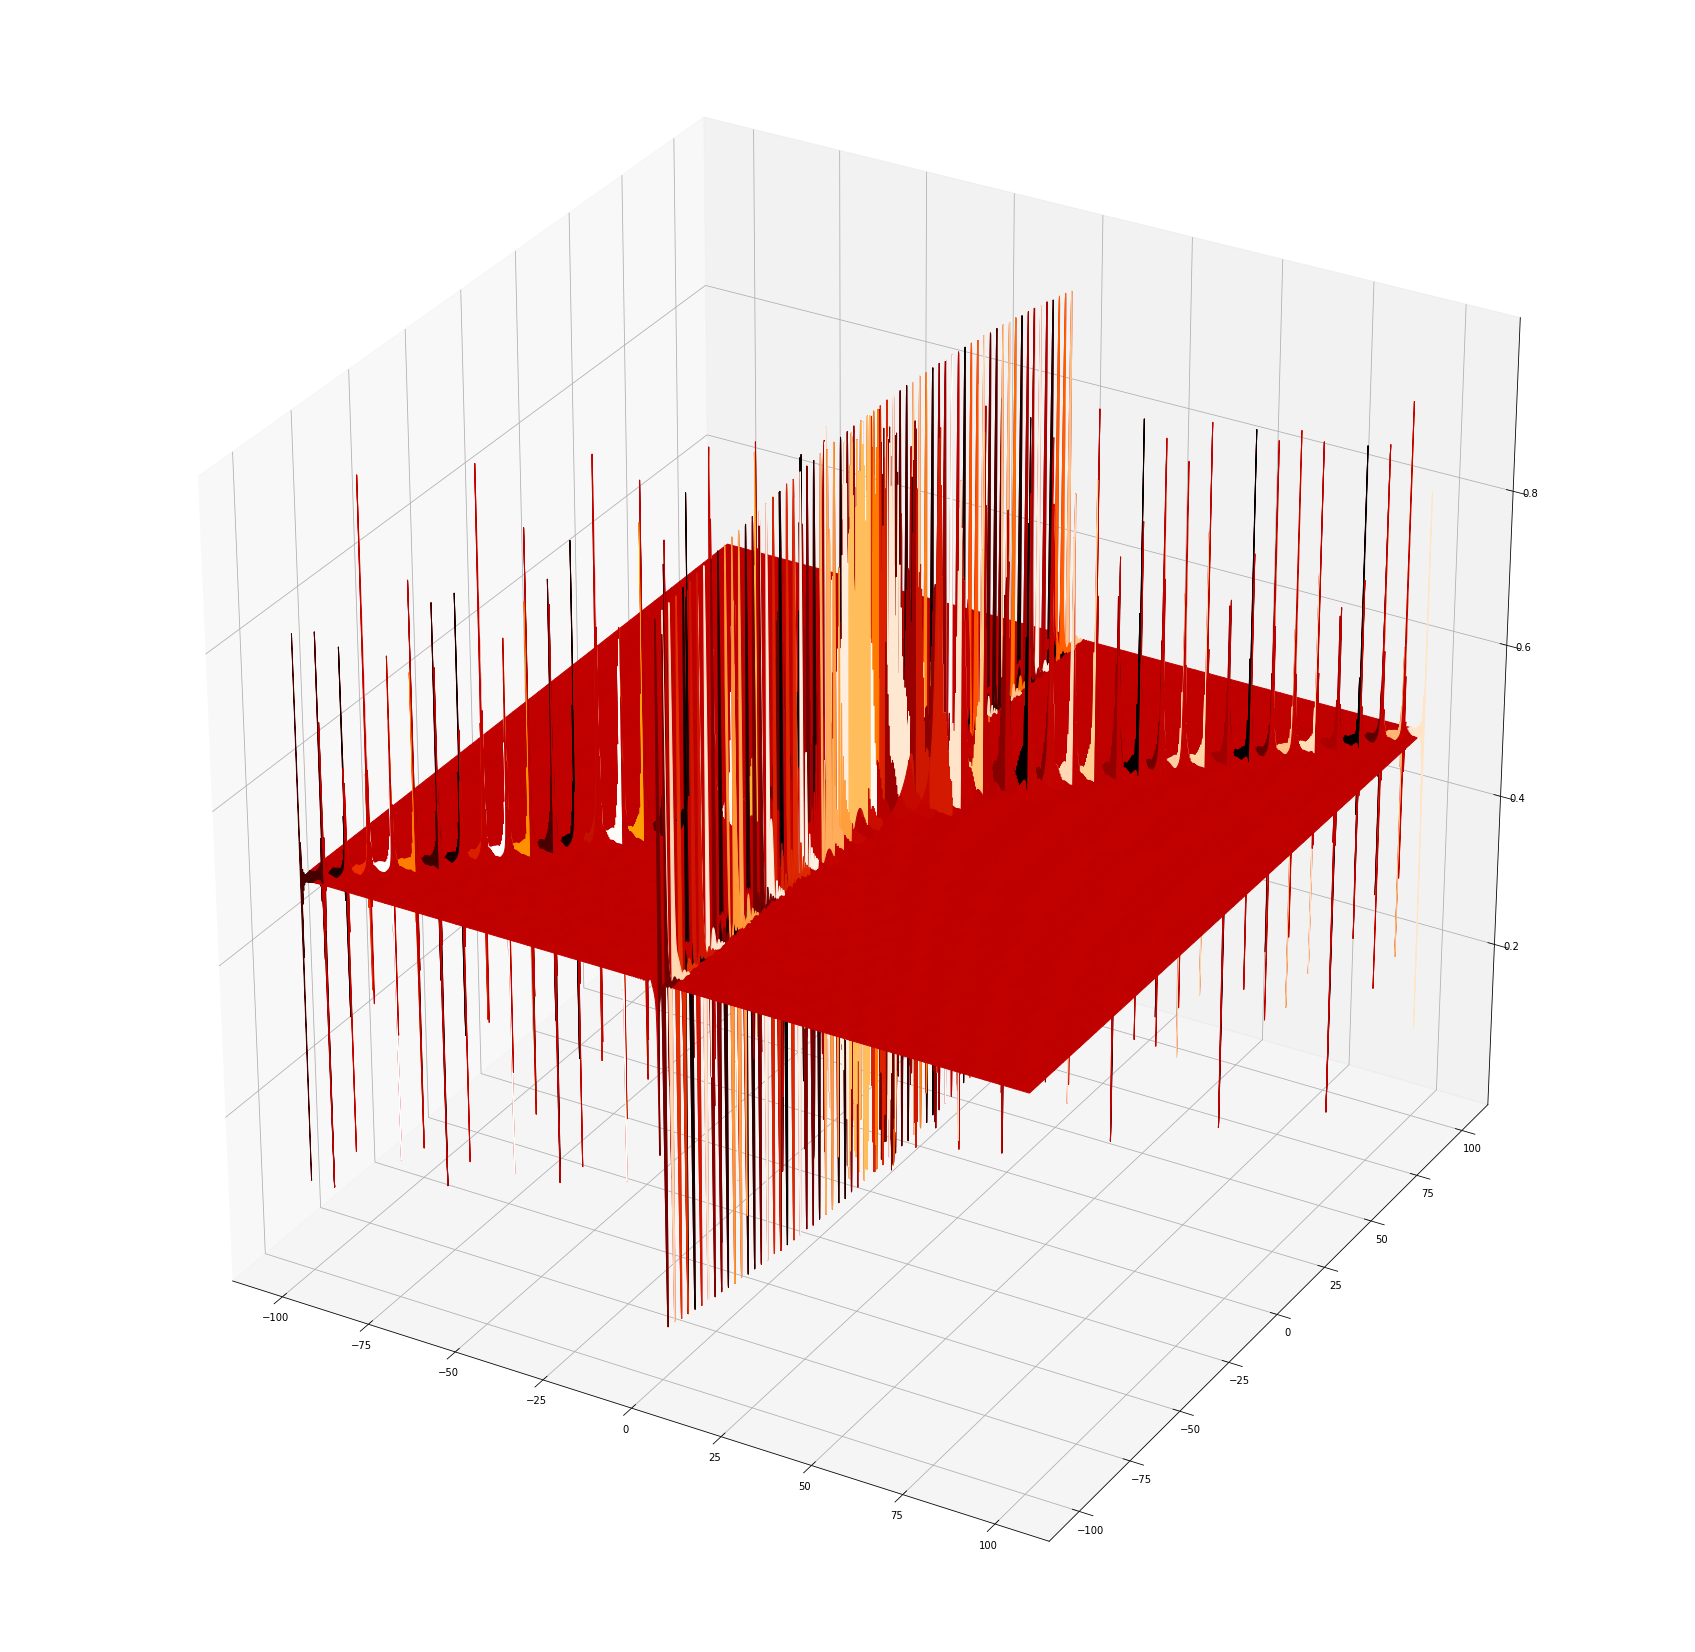

In [0]:
fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(111, projection='3d')
ls = LightSource(270,45)
rgb = ls.shade(z, cmap=cm.gist_heat, vert_exag=0.01, blend_mode='soft')
surf = ax.plot_surface(x,y,z, facecolors=rgb, shade=False)
# surf = ax.plot_surface(x,y,z,  shade=False)

# ax.view_init(0,0)
plt.show()

In [0]:
# ax.view_init(0, 0)
# plt.draw()
# plt.show()

<i>Η συνάρτηση pathological είναι μία μη-αρνητική συνάρτηση. Εμφανίζει πολλές και πυκνές διακυμάνσεις. Επιπλέον μοιάζει να εμφανίζει άπειρα τοπικά ελάχιστα σε επίπεδο παράλληλο στο Oxy και το οποίο τέμνει τον άξονα z.
Επίσης υπάρχουν σημεία απότομης μεταβολής της τιμής, τόσο σε μέγιστα όσο και σε ελάχιστα (που προσεγγίζουν το μηδέν).
Οι ιδιότητες αυτές της συνάρτης πιθανόν ίσως διευκολύνουν την διαδικασία εύρεσης ενός γενετικού αλγορίθμου που θα δώσει ικανοποιητικά αποτελέσματα.

<i>Για τη διευκόλυνση των δοκιμών και των επαναλήψεών τους, εισάγουμε τη χρήση συναρτήσεων που θα πραγματοποιήσουν όσα πραγματοποιήθηκαν και προηγουμένως

In [0]:
from deap import algorithms

def ea_with_stats(ea):  
    pop = toolbox.population(n=200)
    hof = tools.HallOfFame(1,similar=numpy.array_equal)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = ea(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=200, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

Οι διαστάσεις για αρχή είναι 2.

In [0]:
D = 2

In [0]:
from functools import partial
from deap import base, creator

In [0]:
EPOCHS = 50

In [0]:
# Crossover operators args
cross_ops = [partial(tools.cxBlend, alpha=1.0), 
             partial(tools.cxBlend, alpha=4.0), 
             partial(tools.cxSimulatedBinary, eta=8), 
             partial(tools.cxSimulatedBinary, eta=2)] # low for Simulated Binary crossover means big change in genetic material


# Mutation operators args
mut_ops = [partial(tools.mutGaussian, mu=-0.5, sigma=2.5, indpb=0.05), 
           partial(tools.mutGaussian, mu=-0.5, sigma=2.5, indpb=0.25), 
           partial(tools.mutShuffleIndexes, indpb=0.05), 
           partial(tools.mutShuffleIndexes, indpb=0.1)]


# Selection operators args
sel_ops = [3, 10]

# Evolving strategies args
strategies = [
              partial(algorithms.eaSimple, cxpb=0.5, mutpb=0.2, ngen=EPOCHS, verbose=True),
              
              partial(algorithms.eaMuPlusLambda, mu=50, lambda_=150, cxpb=0.5, mutpb=0.2, ngen=EPOCHS,  
                 verbose=True), 
              
              partial(algorithms.eaMuCommaLambda, mu=50, lambda_=200, cxpb=0.5, mutpb=0.2, ngen=EPOCHS, 
                verbose=True)] 

In [0]:
from time import time

In [0]:
def ea_assess(mate, mutate, select, evolve, func=None, rounds=1, D=2):
    mins = []
    nevals = []
    times = []
    hofs = []
    
    for _ in range(rounds):
        creator.create("FitnessMin", base.Fitness , weights=(-1.0,))
        creator.create( "IndividualContainer", list , fitness= creator.FitnessMin)
        toolbox = base.Toolbox()
        toolbox.register( "InitialValue", np.random.uniform, -100, 100)
        toolbox.register( "indiv", tools.initRepeat, creator.IndividualContainer, toolbox.InitialValue, D)
        toolbox.register( "population", tools.initRepeat, list , toolbox.indiv)   
        toolbox.register("mate", mate)
        toolbox.register("mutate", mutate)
        toolbox.register("select", tools.selTournament, tournsize=select)
        toolbox.register("evaluate", func)

        pop = toolbox.population(n=200)
        hof = tools.HallOfFame(1)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("min", np.min)
        t = time()
        pop, logbook = evolve(pop, toolbox, halloffame=hof, stats=stats)
        times.append(time()-t)
        print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

        m, n = logbook.select('min', 'nevals')
        mins.append(m)
        nevals.append(n)
        hofs.append(hof[0].fitness.values[0])
    return mins, hofs, np.cumsum(nevals, 1), times

Ορίζουμε τις παρακάτω συναρτήσεις για την εμφάνιση των αποτελεσμάτων.

In [0]:
def get_stats(assessment, goal, delta):
    mins, hofs, run_sum_nevals, times = assessment
    rounds = len(hofs)
    avg_min = sum(hofs) / rounds
    avg_time = sum(times) / rounds
    avg_evals = sum(run_sum_nevals[:, -1]) / rounds
    best_mins = [min(m) for m in mins]
    
    succ_rounds = [stats for stats in zip(mins, best_mins, run_sum_nevals) if stats[1] < goal + delta]
    
    successes = len(succ_rounds)
    
    if successes:
        s_avg_evals = s_avg_min = s_avg_gen = 0
        for r in succ_rounds:
            first_gen, minim = next(g for g in enumerate(r[0]) if g[1] < goal + delta)
            s_avg_evals += r[2][first_gen]
            s_avg_min += minim
            s_avg_evals += first_gen
        
        s_avg_evals /= successes
        s_avg_min /= successes
        s_avg_gen /= successes
        
    else:
        s_avg_gen = s_avg_min = s_avg_evals = None
        
    return successes, s_avg_min, s_avg_evals, s_avg_gen, avg_min, avg_evals, avg_time

In [0]:
from IPython.display import HTML, display
from tabulate import tabulate

def print_stats(stats):
    algs = [ 'Simple' for i in range(32)] + ['μ+λ' for i in range(32)] + ['μ,λ' for i in range(32)]
    table = [ ['successes', 's.avg.min', 's.avg.evals', 's.avg.gen', 'avg.min', 'avg.evals', 'avg.time'], *stats]
    display(HTML(tabulate(table, tablefmt='html', headers='firstrow')))

In [0]:
import itertools
prod = itertools.product(cross_ops, mut_ops, sel_ops, strategies)

In [0]:
from joblib import Parallel, delayed

pr = itertools.product(cross_ops, mut_ops, sel_ops, strategies)

with Parallel(n_jobs=8, verbose=10) as parallel:
    results2 = parallel(delayed(ea_assess)(*comb, func=pathological, rounds=5)
                                   for comb in pr )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   11.7s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   34.7s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   53.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done  91 out of  96 | elapsed:  2.7min remaining:    8.9s
[Parallel(n_jobs=8)]: Done  96 out of  96 | elapsed:  2.8min finished


In [0]:
GOAL = 0
DELTA = .01

stats = [get_stats(res, GOAL, DELTA) for res in results2]

print_stats(stats)

successes,s.avg.min,s.avg.evals,s.avg.gen,avg.min,avg.evals,avg.time
4,0.00669385,1259.75,0,0.00540521,6214.4,2.19606
5,0.00664914,1459.4,0,0.000334036,5466.4,2.05752
5,0.00446649,1532,0,0.000518984,7191,2.86832
5,0.00618118,1632,0,0.000582856,6164.4,2.69144
4,0.00445922,1460.25,0,0.00958847,5458.4,2.29711
4,0.00549835,841.5,0,0.0104107,7228,3.18938
5,0.00439963,1312.8,0,6.14166e-05,6153,2.34877
5,0.00821281,1048,0,7.42457e-05,5461.8,2.12796
5,0.00320074,1255.8,0,0.00149328,7190.8,3.26888
5,0.0049478,731.6,0,0.000705702,6157.6,3.36679


<i><b> Φαίνεται πως ο καλύτερος αλγόριθμος για τις 2 διαστάσεις είναι ο μ+λ.


### Για D=1, 10, 20, 40 και μεγαλύτερες διαστάσεις

Για τον βέλτιστο αλγόριθμο (που βρήκατε για τις 2 διαστάσεις) και για διαφορετικές τιμές/τάξεις μεγέθους D=1, 10, 20, 40 ή και περισσότερων διαστάσεων του πεδίου ορισμού (σταθερά MAX_GENS και MAX_ROUNDS>=10) τυπώστε πίνακα με: **αριθμό διαστάσεων**, **αριθμό επιτυχιών**, **μέσο ολικό ελάχιστο**, **μέσο αριθμό αποτιμήσεων** και **μέσο χρόνο** (προφανώς βασιστείτε στην αρχική βοηθητική συνάρτηση εκτύπωσης αποτελεσμάτων). 

Σημειώστε ότι οποιεσδήποτε ποινές για άτομα εκτός ορισμού καθώς και τo DELTA, προκειμένου να είναι αποτελεσματικά ως προς την κλιμάκωση των διαστάσεων, θα πρέπει να οριστούν εμπειρικά μεν, αλλά οπωσδήποτε συναρτήσει του πλήθους των διαστάσεων.

α) Σχολιάστε τα αποτελέσματα του πίνακα.

β) Ποιες πιστεύετε είναι οι αιτίες του φαινομένου;

γ) Για σταθερό αριθμό γενεών, πώς μπορούμε να βελτιώσουμε τα αποτελέσματα σε μεγάλες διαστάσεις ως προς το σκέλος της μέσης βέλτιστης τιμής; (Mπορεί να υπάρχουν περισσότερες προσεγγίσεις στο ίδιο πρόβλημα.)

**Σημείωση:** όπως συνήθως συμβαίνει στα υπολογιστικά προβλήματα, μεγαλύτερες διαστάσεις εισόδου σημαίνουν και μεγαλύτερους χρόνους εκτέλεσης. Ταυτόχρονα, οι προς μελέτη συναρτήσεις όλων των ομάδων έχουν διαφορετικές ιδιότητες και βαθμούς δυσκολίας. Συνεπώς, είναι αδύνατον να δώσουμε γενική οδηγία του τί είναι μεγάλες ή μεγαλύτερες διαστάσεις που να ισχύει για όλες τις συναρτήσεις. Δίνουμε κάποιες ενδεικτικές τιμές αλλά μπορείτε να τις προσαρμόσετε (και προς τα κάτω αλλά κυρίως προς τα πάνω) ανάλογα με τους διαθέσιμους πόρους, τον αριθμό επαναλήψεων και του τί θεωρείτε λογικά πλαίσια χρόνου αναμονής.

In [0]:
from joblib import Parallel, delayed

pr = itertools.product(cross_ops, mut_ops, sel_ops, strategies)

with Parallel(n_jobs=8, verbose=10) as parallel:
    results10 = parallel(delayed(ea_assess)(*comb, func=pathological, rounds=10, D=10)
                                   for comb in pr )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   32.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   58.5s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done  91 out of  96 | elapsed:  6.3min remaining:   20.8s
[Parallel(n_jobs=8)]: Done  96 out of  96 | elapsed:  6.6min finished


In [0]:
GOAL = 0
DELTA = .01

stats = [get_stats(res, GOAL, DELTA) for res in results10]

print_stats(stats)

successes,s.avg.min,s.avg.evals,s.avg.gen,avg.min,avg.evals,avg.time
0,,,,2.9031,6159.4,3.34055
0,,,,2.97346,5450.5,3.04479
0,,,,3.05265,7194.7,3.88933
0,,,,2.72293,6203.9,3.64643
0,,,,2.97191,5459.2,3.03104
0,,,,2.696,7182.3,3.92192
0,,,,3.08091,6183.8,3.26361
0,,,,2.9572,5431.2,3.06095
0,,,,2.98553,7200.6,3.23445
0,,,,2.20918,6164.4,3.12527


In [0]:
from joblib import Parallel, delayed

pr = itertools.product(cross_ops, mut_ops, sel_ops, strategies)

with Parallel(n_jobs=8, verbose=10) as parallel:
    results20 = parallel(delayed(ea_assess)(*comb, func=pathological, rounds=10, D=20)
                                   for comb in pr )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   38.5s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done  91 out of  96 | elapsed:  5.9min remaining:   19.3s
[Parallel(n_jobs=8)]: Done  96 out of  96 | elapsed:  6.0min finished


In [0]:
GOAL = 0
DELTA = .01

stats = [get_stats(res, GOAL, DELTA) for res in results20]

print_stats(stats)

successes,s.avg.min,s.avg.evals,s.avg.gen,avg.min,avg.evals,avg.time
0,,,,7.53207,6172.3,3.93945
0,,,,7.85942,5447.5,3.80716
0,,,,7.734,7211.6,4.8936
0,,,,6.86461,6201.6,4.77758
0,,,,7.2303,5447.8,3.82512
0,,,,6.84916,7226.2,5.05098
0,,,,7.70878,6191.4,4.0816
0,,,,7.63294,5453.5,3.74122
0,,,,7.95022,7193.6,4.68217
0,,,,6.90045,6179.7,4.4683


In [0]:
from joblib import Parallel, delayed

pr = itertools.product(cross_ops, mut_ops, sel_ops, strategies)

with Parallel(n_jobs=8, verbose=10) as parallel:
    results40 = parallel(delayed(ea_assess)(*comb, func=pathological, rounds=10, D=40)
                                   for comb in pr )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   24.5s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   49.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done  91 out of  96 | elapsed:  5.4min remaining:   17.8s
[Parallel(n_jobs=8)]: Done  96 out of  96 | elapsed:  5.6min finished


In [0]:
GOAL = 0
DELTA = .01

stats = [get_stats(res, GOAL, DELTA) for res in results40]

print_stats(stats)

successes,s.avg.min,s.avg.evals,s.avg.gen,avg.min,avg.evals,avg.time
0,,,,17.0143,6178.4,2.50153
0,,,,17.1986,5431.1,2.35281
0,,,,17.4113,7207.2,3.06438
0,,,,15.377,6222.8,2.68631
0,,,,16.3714,5455.7,2.35576
0,,,,16.0554,7208.7,3.01108
0,,,,17.2407,6218,2.46026
0,,,,17.1414,5454.6,2.41685
0,,,,17.6495,7200.6,2.97412
0,,,,15.7126,6221.8,2.69824


In [0]:
pr = itertools.product(cross_ops, mut_ops, sel_ops, strategies)
for param in pr:
    results  = ea_assess(*param, func=pathological, D=1,rounds=10)

<b> α),β)<br>
<i>Στον πίνακα φαίνεται ότι όσο αυξάνεται ο μέσος αριθμός γενεών (success.avg.gen) που απαιτείαι για να υπάρξει σύγκλιση, ενώ σημειώνεται πτωτική τάση για τις συνολικές επιτυχίες των αλγορίθμων (successes).
Αντίστοιχα, ο μέσος όρος των αποτιμήσεων για την επίτευξη τιμής κάτω από το όριο GOAL+DELTA εμφανίζει τάση ανόδου.

Η φύση της συνάρτησης είναι τέτοια ώστε, παρόλο το γεγονός ότι είναι μη αρνητική, με μικρές μεταβολές εμφανίζονται μεγάλες πτώσης της τιμής της, κάτι που συγκρατεί εν τέλει την ανοδική πορεία των προαναφερθέντων μεγεθών σε αναλογία με την αύξηση των διαστάσεων.

Όσο αυξάνονται οι διαστάσεις τόσο προστίθενται σταθεροί όροι στην τιμή της συνάρτησης, οπότε είναι αναμενόμενο να απομακρύνεται από το 0.

<b>γ)

<b><i>Η συνάρτηση εμφανίζει πολλούς και απότομους μηδενισμούς. Εφόσον οι διαστάσεις θα αυξάνονται, θα αυξάνονται και οι μηδενισμοί.
Διαισθητικά αντιλαμβανόμαστε ότι αν πραγματοποιούνται μικρές μεταβολές σε κάθε χρωμόσωμα, είναι αρκετά πιθανό να μεταβούμε σε κάποιο μηδενικό.
Επιπλέον, μία αρχικοποίηση που να υπακούει σε κανονική κατανομή θα βοήθαγε πιθανως σε ταχύτερη σύγκλιση, καθώς οι μηδενισμοί πληθαίνουν γύρο από το 0.



## Ευρετήρια συναρτήσεων για benchmarking στη βελτιστοποίηση

- [Electric Power Systems Analysis & Nature-Inspired Optimization](https://al-roomi.org/benchmarks/unconstrained)

- [Global Optimization Test Functions Index](http://infinity77.net/global_optimization/test_functions.html)

- [BenchmarkFcns Toolbox](http://benchmarkfcns.xyz/fcns)

- [Virtual Library of Simulation Experiments: Test Functions and Datasets](https://www.sfu.ca/~ssurjano/optimization.html)

- [DEAP Benchmarks functions](http://deap.readthedocs.io/en/master/api/benchmarks.html)




## Βιβλιογραφία

- Jamil, Momin, and Xin-She Yang. "A literature survey of benchmark functions for global optimisation problems." International Journal of Mathematical Modelling and Numerical Optimisation 4.2 (2013): 150-194. [link](https://goo.gl/qAhxNf). Προσοχή στα [errata](https://docs.google.com/document/d/1MrRpq8q_hDfBZVw1CHBzC7t4biQkAftu3LEWXJMf6s0/edit?usp=sharing) στους ορισμούς των συναρτήσεων.

- Whitley, Darrell, et al. "Evaluating evolutionary algorithms." Artificial intelligence 85.1-2 (1996): 245-276. [link](https://www.sciencedirect.com/science/article/pii/0004370295001247/pdf?md5=41088a944920336e5d8493160de27800&pid=1-s2.0-0004370295001247-main.pdf&_valck=1)

- "Gradient Free Optimization". Stanford AA222 - Introduction to Multidisciplinary Design Optimization handouts. [link](http://adl.stanford.edu/aa222/Lecture_Notes_files/chapter6_gradfree.pdf) 






## Σημείωσεις για την υλοποίηση

- Λόγω των πολλών επαναλήψεων είναι απαραίτητη και θα αξιολογηθεί η **εκτεταμένη χρήση συναρτήσεων**.
- Για απορίες και διευκρυνίσεις ως συνήθως συμβουλευτείτε πρώτα το [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing) και στη συνέχεια αν χρειαστεί μπορείτε να στείλετε mail στο [nnlab@islab.ntua.gr](mailto:nnlab@islab.ntua.gr)

## Παράδοση

### Ημερομηνία παράδοσης

Πέμπτη 28 Φεβρουαρίου 2019 (παρακαλούμε όχι αιτήματα για παράταση).

### Παραδοτέα

Στο mycourses του μαθήματος εντός ενός zip file:

- το αρχείο ipynb του notebook σας με τις απαντήσεις σας (ορατά τα κελιά εξόδου σύμφωνα με το FAQ). Μην ξεχάσετε ένα κελί με τα ονόματα σας καθώς και τον αριθμό της ομάδας σας.
- ο καθαρός κώδικας Python του notebook δηλαδή το αρχείο .py.


<table>
  <tr>
    <td bgcolor="#FCF8E3"><font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!!</font>
</td>
  </tr>
</table>

**Καλή επιτυχία!** 👍